**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [3]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


Text(0.5, 1.0, 'Label: 0')

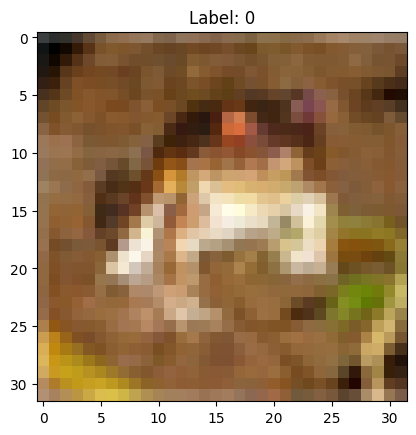

In [4]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
#
#
# Your code to display a few images before the model development.
#
#
plt.imshow(X_train[0], cmap=plt.cm.gray )
plt.title(f"Label: {y_train[0].argmax()}")

In [5]:
# Preprocess the data
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

In [6]:
# Create an MLP model using Keras
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train and evaluate the MLP classifier
mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8559 - accuracy: 0.3324
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6612 - accuracy: 0.4037
Epoch 3/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.5818 - accuracy: 0.4318
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5388 - accuracy: 0.4478
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4999 - accuracy: 0.4636
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4737 - accuracy: 0.4733
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4480 - accuracy: 0.4804
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4229 - accuracy: 0.4913
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4034 - accuracy: 0.4958
Epoch 10/10
1563/1563 [==============================] - 38s 24m

In [8]:
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 48.81%


In [9]:
# Create a CNN model using Keras
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train and evaluate the CNN classifier
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5313 - accuracy: 0.4375
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.1804 - accuracy: 0.5821
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0365 - accuracy: 0.6336
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9351 - accuracy: 0.6700
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8582 - accuracy: 0.6996
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8044 - accuracy: 0.7169
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7548 - accuracy: 0.7359
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7079 - accuracy: 0.7531
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6671 - accuracy: 0.7675
Epoch 10/10
1563/1563 [==============================] - 60s 39m

In [11]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 70.78%


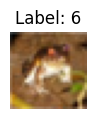

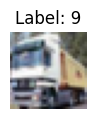

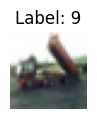

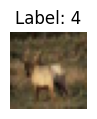

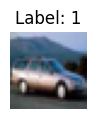

In [12]:
# Display a few images after CNN model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [16]:
#
#
#
# Your code to do the above activity.
# Hint - Put name of optimizers in a list and use  loops
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.
# Hint - Store training time in a list
#
#

import time

optList = ['Adagrad','Nadam', 'Adamax']
timeList = []
accuracy_list = []
loss_list = []
for i in optList:
   cnn_model = Sequential()
   cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
   cnn_model.add(MaxPooling2D((2, 2)))
   cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
   cnn_model.add(MaxPooling2D((2, 2)))
   cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
   cnn_model.add(Flatten())
   cnn_model.add(Dense(64, activation='relu'))
   cnn_model.add(Dense(10, activation='softmax'))
   cnn_model.compile(optimizer=i, loss='categorical_crossentropy', metrics=['accuracy'])

   start_time = time.time()
   cnn_model.fit(X_train, y_train, epochs=1)
   end_time = time.time()

   timeList.append(end_time - start_time)

   print(f"Time taken: {end_time - start_time }")

   cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
   accuracy_list.append(cnn_accuracy)
   loss_list.append(cnn_loss)
   print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")


1563/1563 [==============================] - 78s 50ms/step - loss: 2.2032 - accuracy: 0.1824
Time taken: 84.7978401184082
CNN Test Accuracy: 24.47%
1563/1563 [==============================] - 68s 42ms/step - loss: 1.4658 - accuracy: 0.4650
Time taken: 69.75339221954346
CNN Test Accuracy: 57.34%
1563/1563 [==============================] - 67s 42ms/step - loss: 1.6811 - accuracy: 0.3834
Time taken: 67.90289664268494
CNN Test Accuracy: 48.07%


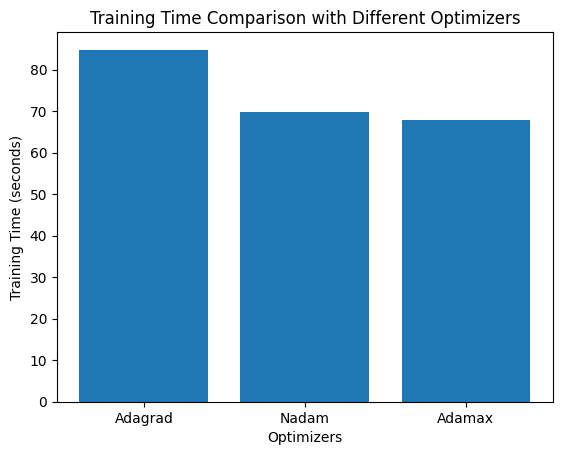

Adagrad Optimizer - Test Accuracy: 24.47%
Nadam Optimizer - Test Accuracy: 57.34%
Adamax Optimizer - Test Accuracy: 48.07%
Highest Accuracy Achieved: 57.34%


In [17]:
plt.bar(optList, timeList)
plt.xlabel('Optimizers')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison with Different Optimizers')
plt.show()

for i, optimizer in enumerate(optList):
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracy_list[i] * 100:.2f}%")

# Find and print the highest achieved accuracy
best_accuracy = max(accuracy_list)
print(f"Highest Accuracy Achieved: {best_accuracy * 100:.2f}%")

Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.
